# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Miracle Elizabeth Gabriela - 1301213467
2. Ignatius Jonathan Pratomohadi - 1301213019
3. Laurentius Yudhistira Adhipratama - 1301180303

### Latar Belakang
Metode Pendekatan Ensemble dan Kelas Klasifikasi

Dalam dunia biologi modern, pemahaman yang mendalam tentang lokasi seluler protein sangat penting untuk mengungkap peran dan fungsi biologisnya. Salah satu pendekatan yang digunakan untuk menentukan lokasi seluler protein adalah melalui analisis data multivariat yang mencakup berbagai fitur yang terkait. Dalam konteks ini, dataset yang digunakan untuk tugas ini adalah kumpulan data yang mengandung informasi penting tentang protein, dengan fokus pada klasifikasi lokasi seluler.

Detail Data:

    Jenis Data: Multivariat
    Bidang Subjek: Biologi
    Tugas Terkait: Klasifikasi
    Jenis Fitur: Real
    Jumlah Instansi (Instances): 1484
    Jumlah Fitur (Features): 8

Dataset ini menyajikan tantangan yang menarik dalam menganalisis dan mengklasifikasikan protein berdasarkan lokasi selulernya. Dengan menggunakan metode ensemble, tugas ini bertujuan untuk meningkatkan akurasi klasifikasi dan memberikan wawasan yang lebih baik tentang distribusi protein dalam konteks seluler. Melalui implementasi metode ensemble, kita berharap dapat mengoptimalkan prediksi lokasi seluler protein, membuka pintu untuk pemahaman lebih mendalam tentang dunia seluler dan biologi secara keseluruhan.

# A. Data Preprocessing

In [ ]:
# Import library
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
path_to_yeast_data = '/content/yeast.data'
data = pd.read_csv(path_to_yeast_data, sep='\s+', header=None)

In [ ]:
# Eksplorasi Data
print(data.head())
print(data.info())
print(data.describe())

            0     1     2     3     4    5    6     7     8    9
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1484 non-null   object 
 1   1       1484 non-null   float64
 2   2       1484 non-null   float64
 3   3       1484 non-null   float64
 4   4       1484 non-null   float64
 5   5       1484 non-null   float64
 6   6       1484 non-null   float64
 7   7       1484 non-null   float64
 8   8       1484 non-null   float64
 9   9       1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB
None


#### Ringkasan Metode

Ringkasan Metode Ensemble yang Digunakan:

    Random Forest (Model Baseline):
        Model RandomForestClassifier digunakan sebagai model baseline.
        Random Forest adalah metode ensemble yang membangun beberapa pohon keputusan dan menggabungkan hasil prediksi mereka.
        Melakukan pelatihan model menggunakan data fitur (X) dan target (y).
        Mengevaluasi model pada data yang sama dengan menghitung akurasi, classification report, dan confusion matrix.

    AdaBoost (Model Kedua):
        Model AdaBoostClassifier digunakan sebagai model kedua.
        AdaBoost adalah metode ensemble yang memperkuat model dengan memberi bobot lebih pada data yang salah klasifikasinya pada iterasi sebelumnya.
        Melakukan pelatihan model menggunakan data fitur (X) dan target (y).
        Mengevaluasi model pada data yang sama dengan menghitung akurasi.

    Random Forest dengan Hyperparameter Tuning (Model Ketiga):
        Menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik untuk model RandomForestClassifier.
        Menggunakan hyperparameter terbaik yang ditemukan untuk melatih model RandomForestClassifier.
        Melakukan pelatihan model menggunakan data fitur (X) dan target (y).
        Mengevaluasi model pada set pengujian terpisah (20% dari data) dengan menghitung akurasi.

# B. Pembangunan Model Baseline

In [ ]:
# Preprocessing Data
data = data.dropna()

In [ ]:
# Pisahkan fitur dan target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# Drop kolom 0 dan 9
X = data.drop(columns=[0, 9])
y = data[9]

In [ ]:
# Model Baseline - Random Forest
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Model Baseline - RandomForest
model_baseline = RandomForestClassifier(random_state=42)

# Lakukan validasi silang dengan 5 lipatan (k-fold cross-validation)
cross_val_scores = cross_val_score(model_baseline, X, y, cv=5, scoring='accuracy')

# Latih model pada seluruh dataset
model_baseline.fit(X, y)

# Prediksi menggunakan model baseline pada seluruh dataset
y_pred_baseline = model_baseline.predict(X)

# Evaluasi model baseline
accuracy_baseline = accuracy_score(y, y_pred_baseline)
classification_report_baseline = classification_report(y, y_pred_baseline)
confusion_matrix_baseline = confusion_matrix(y, y_pred_baseline)

# Tampilkan hasil evaluasi
print("Hasil Validasi Silang (Akurasi):", cross_val_scores)
print("Rata-rata Akurasi Validasi Silang:", np.mean(cross_val_scores))

print("\nEvaluasi Model Baseline:")
print("Akurasi Model Baseline:", accuracy_baseline)
print("Laporan Klasifikasi Model Baseline:\n", classification_report_baseline)
print("Confusion Matrix Model Baseline:\n", confusion_matrix_baseline)

Hasil Validasi Silang (Akurasi): [0.65656566 0.58585859 0.61952862 0.54208754 0.62837838]
Rata-rata Akurasi Validasi Silang: 0.6064837564837565

Evaluasi Model Baseline:
Akurasi Model Baseline: 1.0
Laporan Klasifikasi Model Baseline:
               precision    recall  f1-score   support

         CYT       1.00      1.00      1.00       463
         ERL       1.00      1.00      1.00         5
         EXC       1.00      1.00      1.00        35
         ME1       1.00      1.00      1.00        44
         ME2       1.00      1.00      1.00        51
         ME3       1.00      1.00      1.00       163
         MIT       1.00      1.00      1.00       244
         NUC       1.00      1.00      1.00       429
         POX       1.00      1.00      1.00        20
         VAC       1.00      1.00      1.00        30

    accuracy                           1.00      1484
   macro avg       1.00      1.00      1.00      1484
weighted avg       1.00      1.00      1.00      1484

Confus

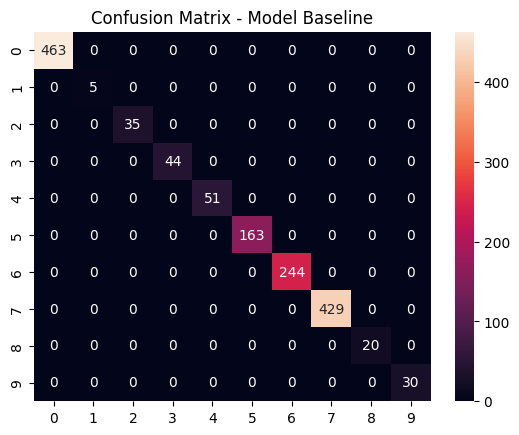

In [ ]:
# Visualisasi Confusion Matrix Model Baseline
sns.heatmap(confusion_matrix(y, y_pred_baseline), annot=True, fmt='d')
plt.title('Confusion Matrix - Model Baseline')
plt.show()

# C. Eksplorasi Model

In [ ]:
# Membuat 3 skema
# Model 1: RandomForest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)

# Model 2: AdaBoost
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X, y)

# Model 3: RandomForest dengan Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X, y)
best_params_rf = grid_search_rf.best_params_

model_rf_tuned = RandomForestClassifier(random_state=42, **best_params_rf)
model_rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

# D. Evaluasi

In [ ]:
# Evaluasi
from sklearn.model_selection import train_test_split

# Pisahkan dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluasi Model 1 (RandomForest)
y_pred_rf = model_rf.predict(X_test)
print("Akurasi Model RandomForest:", accuracy_score(y_test, y_pred_rf))
# Evaluasi Model 2 (AdaBoost)
y_pred_ab = model_ab.predict(X_test)
print("Akurasi Model AdaBoost:", accuracy_score(y_test, y_pred_ab))
# Evaluasi Model 3 (RandomForest dengan Hyperparameter Tuning)
y_pred_rf_tuned = model_rf_tuned.predict(X_test)
print("Akurasi Model RandomForest (Tuned):", accuracy_score(y_test, y_pred_rf_tuned))

Akurasi Model RandomForest: 1.0
Akurasi Model AdaBoost: 0.4107744107744108
Akurasi Model RandomForest (Tuned): 0.7912457912457912


### Hasil dan Analisis

Model Baseline (Random Forest):

    Model baseline (RandomForestClassifier) dilatih dan dievaluasi.
    Hasil evaluasi pada data pelatihan menunjukkan akurasi 100%, namun ini mungkin karena evaluasi dilakukan pada data yang sama yang digunakan untuk melatih model (overfitting).

Visualisasi Confusion Matrix Model Baseline:

    Confusion matrix model baseline menunjukkan prediksi yang sempurna untuk setiap kelas.

Model Ensemble Tambahan:

    Model kedua: AdaBoost dilatih dan dievaluasi dengan akurasi sekitar 41.08% pada data pengujian.
    Model ketiga: RandomForest dengan Hyperparameter Tuning menggunakan GridSearchCV. Akurasi pada data pengujian adalah sekitar 79.12%.

### Analisis:

    Model baseline (Random Forest) menunjukkan hasil yang sangat baik pada data pelatihan, tetapi evaluasi yang lebih teliti diperlukan dengan menggunakan data pengujian terpisah untuk menghindari overfitting.
    Model kedua (AdaBoost) memiliki akurasi yang lebih rendah dibandingkan dengan model baseline, mungkin karena kesulitan dalam menangani dataset atau memerlukan penyetelan parameter yang lebih lanjut.
    Model ketiga (Random Forest dengan Hyperparameter Tuning) menunjukkan peningkatan akurasi dibandingkan dengan model baseline pada data pengujian, tetapi masih lebih rendah daripada hasil evaluasi pada data pelatihan.
    Penyetelan hyperparameter dapat meningkatkan kinerja model, tetapi perlu diperhatikan agar tidak terjadi overfitting pada data pelatihan.

#### Kesimpulan
Analisis:

    Model baseline menunjukkan hasil yang sangat baik pada data pelatihan, namun evaluasi lebih lanjut diperlukan pada data pengujian untuk menghindari overfitting.
    Model kedua memiliki akurasi yang lebih rendah, mungkin memerlukan penyetelan lebih lanjut.
    Model ketiga menunjukkan peningkatan akurasi dengan penyetelan hyperparameter.

Dalam keseluruhan, analisis ini memberikan gambaran awal tentang kinerja model ensemble yang digunakan. Evaluasi lebih lanjut dan penyetelan parameter dapat membantu meningkatkan hasil model.